In [17]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta

import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={"figure.figsize": (20, 10)}) 

from cryptocompare import get_daily_trade_hist

Tether (USDT) is cryptocurrency that is pegged to the US dollar. This peg comes from the market's acceptance that one USDT is backed by a dollar in a vault somewhere. I say "somewhere", because it's not fully known what banks are holding these USD deposits, although there is [speculation that they are located in Puerto Rico](https://blog.bitmex.com/tether/). 

Aside from the scrutiny that Tether has come under for the lack of reporting and auditing of its reserves, the cryptocurrency has also come under scrutiny for it's possible use in market manipulation. 

https://www.bloomberg.com/graphics/2018-tether-kraken-trades/?srnd=cryptocurriences

https://www.bloomberg.com/news/articles/2018-06-13/professor-who-rang-vix-alarm-says-tether-used-to-boost-bitcoin

In this notebook I want to explore Tether price and supply against prices in the cryptocurrency market, to see what effects the introduction of new tether may have on prices. 



In [2]:
tether = pd.read_csv(
    'price_data/tether_market_cap_data.csv',
    parse_dates=True, 
    index_col='Date',
    thousands=','
)[::-1]

In [3]:
tether.index.name = 'time'
tether.columns = [col.lower().replace(' ','') for col in tether.columns]
tether.tail()

,open,high,low,close,volume,marketcap
time,,,,,,
2018-07-12,1.000000,1.01,0.994467,0.999070,2404160000,2613080000
2018-07-13,0.999377,1.01,0.995791,1.000000,2279970000,2705450000
2018-07-14,1.000000,1.01,0.998031,1.000000,1620770000,2713230000
2018-07-15,1.000000,1.00,0.996664,0.998352,1919560000,2713580000
2018-07-16,0.998966,1.00,0.988297,0.999139,2864660000,2704340000


array([<matplotlib.axes._subplots.AxesSubplot object at 0x10a797a20>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x10b4773c8>], dtype=object)

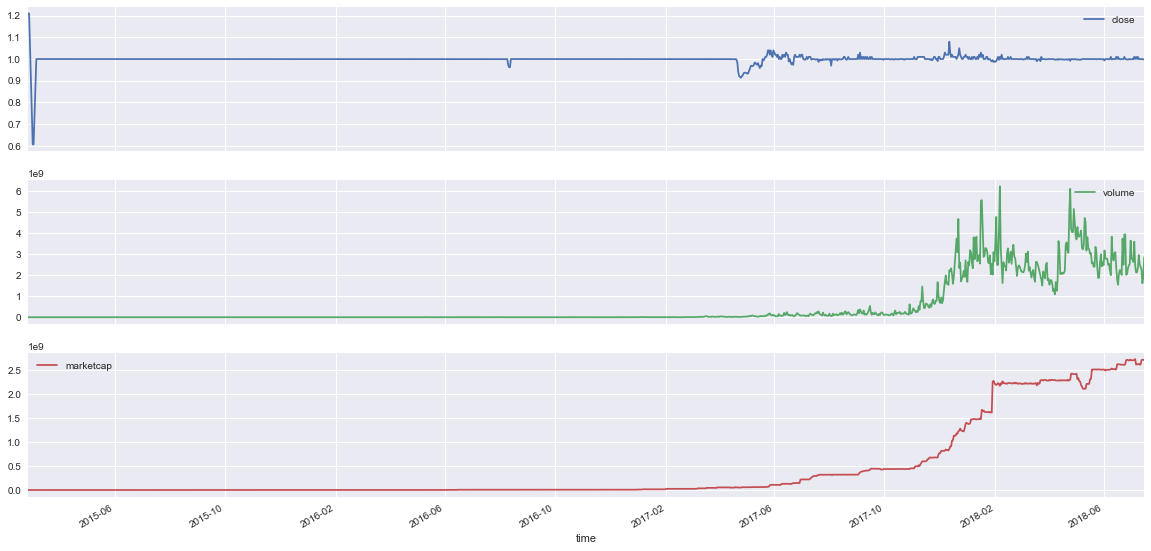

In [18]:
rel_cols = ['close','volume','marketcap']
df = tether[rel_cols]
df.plot(subplots=True)

In [5]:
df.corr()

,close,volume,marketcap
close,1.000000,0.067079,0.046204
volume,0.067079,1.000000,0.910252
marketcap,0.046204,0.910252,1.000000


In [20]:
btc = get_daily_trade_hist('BTC')[tether.index.min():]

In [21]:
df = tether.join(btc, rsuffix='_btc')

In [22]:
df.head()

,open,high,low,close,volume,marketcap,mcap_change,close_btc,high_btc,low_btc,open_btc,volumefrom,volumeto
time,,,,,,,,,,,,,
2015-02-25,1.210000,1.220000,1.210000,1.210000,6,304476,NaN,237.33,239.64,234.59,238.89,38095.34,9092357.66
2015-02-26,1.210000,1.210000,1.190000,1.210000,6,304542,0.000217,236.53,238.17,233.50,237.33,50871.35,12064967.48
2015-03-02,0.571249,0.607890,0.568314,0.606502,3,143726,-0.528059,273.75,274.80,256.15,257.94,81093.26,21562624.62
2015-03-03,0.605129,0.606229,0.604416,0.606229,3,152250,0.059307,280.65,287.06,266.12,273.75,164816.88,45650597.34
2015-03-06,1.000000,1.000000,1.000000,1.000000,93,251600,0.652545,272.56,277.99,269.02,275.23,98796.90,27014943.36


array([<matplotlib.axes._subplots.AxesSubplot object at 0x10be87198>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x10c059a20>], dtype=object)

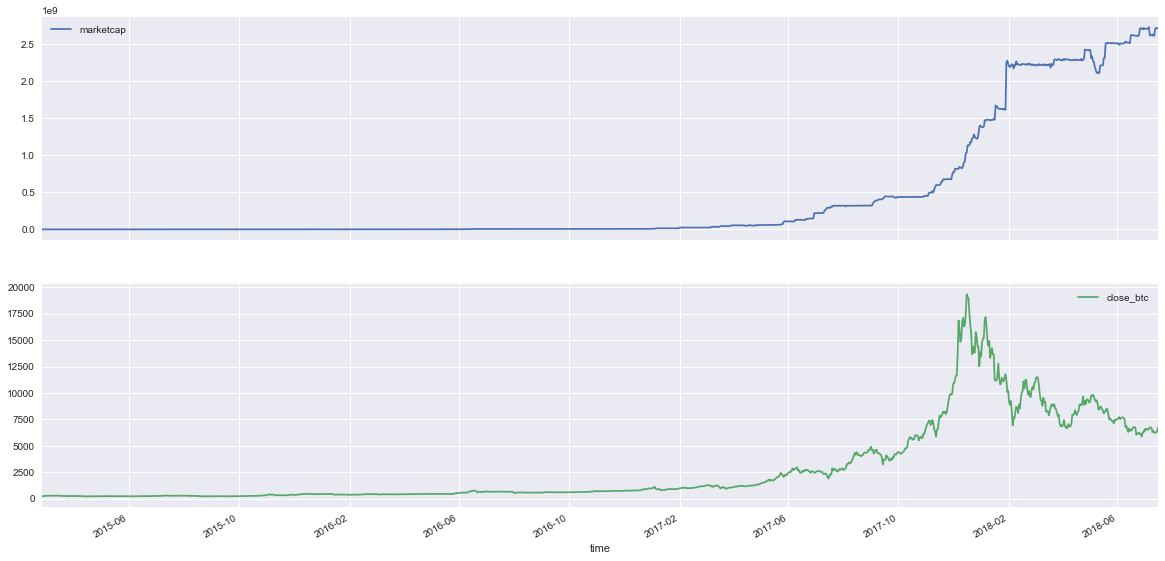

In [23]:
df[['marketcap','close_btc']].plot(subplots=True)

In [10]:
df[['marketcap','close_btc']].corr()

,marketcap,close_btc
marketcap,1.000000,0.783826
close_btc,0.783826,1.000000


In [52]:
df['t_change_1d'] =  df.marketcap.diff(1)
large_t_change = df[df.t_change_1d >= 50e6]
large_t_change

,open,high,low,close,volume,marketcap,mcap_change,close_btc,high_btc,low_btc,open_btc,volumefrom,volumeto,t_change_1d
time,,,,,,,,,,,,,,
2017-06-30,1.020000,1.02,0.997355,1.010000,72550400,218616000,0.492422,2480.61,2576.28,2469.54,2558.37,73001.60,1.838789e+08,72132000.0
2017-11-30,1.000000,1.03,0.989319,1.010000,1043970000,741868000,0.098969,9946.76,10689.06,9023.77,9848.05,187008.87,1.836210e+09,66810000.0
2017-12-13,1.080000,1.09,1.020000,1.030000,2198140000,906935000,0.060983,16286.82,17267.96,15669.86,17083.90,155407.35,2.576056e+09,52129000.0
2017-12-15,1.010000,1.02,0.995525,1.020000,2044500000,1029020000,0.127362,17604.85,17987.03,16442.20,16467.91,153651.15,2.682351e+09,116252000.0
2017-12-17,1.010000,1.02,1.000000,1.010000,1931020000,1132150000,0.092060,19065.71,19870.62,18750.91,19346.60,117408.38,2.264650e+09,95440000.0
2017-12-22,1.010000,1.06,0.963089,1.020000,4687950000,1225820000,0.046136,13664.97,15823.72,10875.71,15632.12,466980.60,6.245732e+09,54060000.0
2017-12-29,1.010000,1.02,1.000000,1.010000,1929090000,1281970000,0.048964,14392.57,15109.81,13951.08,14398.45,118874.63,1.733584e+09,59840000.0
2017-12-30,1.010000,1.03,0.992842,1.020000,2711060000,1378640000,0.075407,12531.52,14461.46,11962.09,14392.14,182065.44,2.387311e+09,96670000.0
2018-01-05,1.000000,1.01,0.985915,0.998634,3096620000,1470660000,0.060975,16954.78,17126.95,14832.36,15180.08,141960.42,2.283989e+09,84520000.0


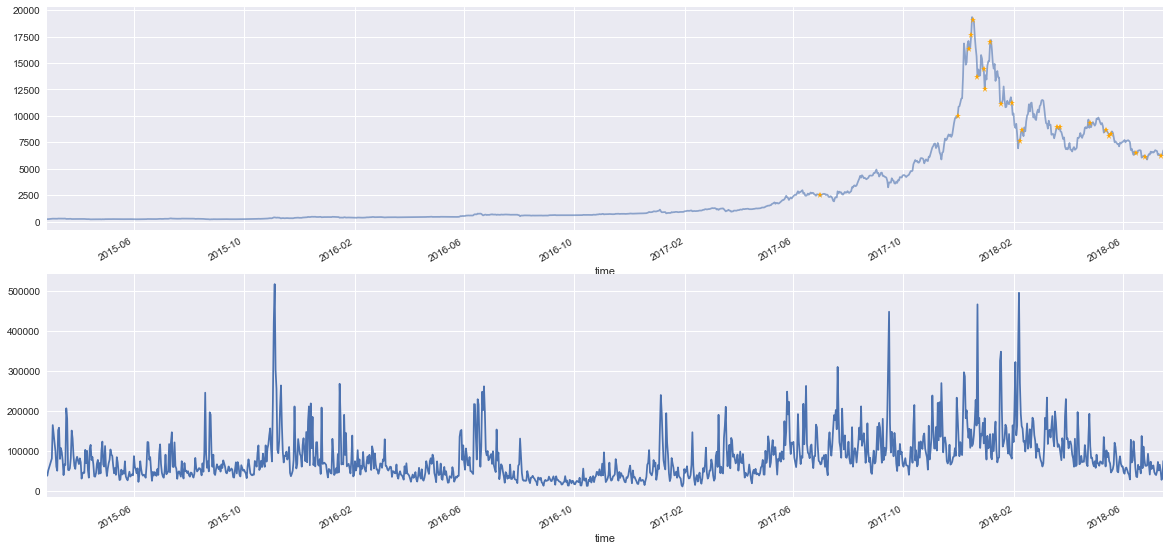

In [56]:
plt.subplot(2,1,1)
df.close_btc.plot(alpha=0.6)
large_t_change.close_btc.plot(ls='', marker='*', color='orange')
plt.subplot(2,1,2)
df.volumefrom.plot()

In [ ]:
large_t_change.index.

In [70]:
large_t_change.groupby(7).t_change_1d.sum().plot(kind='bar')

KeyError: 7

In [68]:
large_t_change.groupby(large_t_change.index.year).t_change_1d.sum()

TypeError: unhashable type: 'numpy.ndarray'

In [11]:
df[['marketcap','close_btc']].df(1).corr()#.plot(subplots=True)

,marketcap,close_btc
marketcap,1.000000,-0.080908
close_btc,-0.080908,1.000000


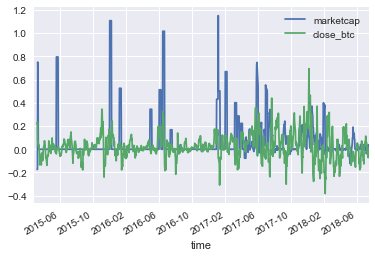

In [12]:
df[['marketcap','close_btc']].pct_change(7).plot()

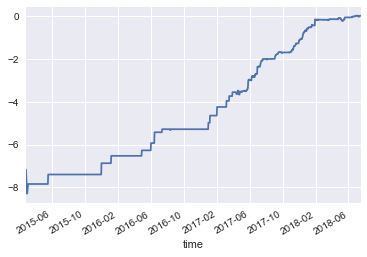

In [13]:
np.cumsum(df.marketcap[::-1].pct_change(1)).plot()

In [14]:
tether['mcap_change'] = tether.marketcap.pct_change(1)

In [15]:
btc.tail()

,close,high,low,open,volumefrom,volumeto
time,,,,,,
2018-07-14,6268.75,6332.46,6190.18,6229.61,27713.18,1.744168e+08
2018-07-15,6364.26,6401.50,6245.75,6268.32,34225.90,2.185433e+08
2018-07-16,6740.55,6761.84,6349.83,6364.26,74798.53,4.942649e+08
2018-07-17,7326.70,7476.24,6677.56,6740.54,112707.21,7.994015e+08
2018-07-18,7383.16,7383.16,7326.19,7326.76,6542.51,4.851249e+07


In [16]:
tether.head(100)

,open,high,low,close,volume,marketcap,mcap_change
time,,,,,,,
2015-02-25,1.210000,1.220000,1.210000,1.210000,6,304476,NaN
2015-02-26,1.210000,1.210000,1.190000,1.210000,6,304542,0.000217
2015-03-02,0.571249,0.607890,0.568314,0.606502,3,143726,-0.528059
2015-03-03,0.605129,0.606229,0.604416,0.606229,3,152250,0.059307
2015-03-06,1.000000,1.000000,1.000000,1.000000,93,251600,0.652545
2015-03-07,1.000000,1.000000,1.000000,1.000000,58197,251600,0.000000
2015-03-08,1.000000,1.000000,1.000000,1.000000,31,251600,0.000000
2015-03-09,1.000000,1.000000,1.000000,1.000000,143,251600,0.000000
2015-03-10,1.000000,1.000000,1.000000,1.000000,49997,251600,0.000000


In [71]:
df.head()

,open,high,low,close,volume,marketcap,mcap_change,close_btc,high_btc,low_btc,open_btc,volumefrom,volumeto,t_change_1d
time,,,,,,,,,,,,,,
2015-02-25,1.210000,1.220000,1.210000,1.210000,6,304476,NaN,237.33,239.64,234.59,238.89,38095.34,9092357.66,NaN
2015-02-26,1.210000,1.210000,1.190000,1.210000,6,304542,0.000217,236.53,238.17,233.50,237.33,50871.35,12064967.48,66.0
2015-03-02,0.571249,0.607890,0.568314,0.606502,3,143726,-0.528059,273.75,274.80,256.15,257.94,81093.26,21562624.62,-160816.0
2015-03-03,0.605129,0.606229,0.604416,0.606229,3,152250,0.059307,280.65,287.06,266.12,273.75,164816.88,45650597.34,8524.0
2015-03-06,1.000000,1.000000,1.000000,1.000000,93,251600,0.652545,272.56,277.99,269.02,275.23,98796.90,27014943.36,99350.0


In [95]:
large_t_change['time'] = large_t_change.index
large_t_change.time.diff().plot(kine=)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


time
2017-06-30        NaT
2017-11-30   153 days
2017-12-13    13 days
2017-12-15     2 days
2017-12-17     2 days
2017-12-22     5 days
2017-12-29     7 days
2017-12-30     1 days
2018-01-05     6 days
2018-01-17    12 days
2018-01-29    12 days
2018-02-07     9 days
2018-02-09     2 days
2018-03-20    39 days
2018-03-23     3 days
2018-04-26    34 days
2018-05-13    17 days
2018-05-17     4 days
2018-05-19     2 days
2018-06-16    28 days
2018-06-26    10 days
2018-07-13    17 days
Name: time, dtype: timedelta64[ns]

In [99]:
large_t_change['days_since_last_change'] = large_t_change.time.diff()[1:].apply(lambda t: t.days)#.plot(kind='bar')

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [102]:
large_t_change.groupby(large_t_change.index.year).days_since_last_change.median()

SystemError: <class 'str'> returned a result with an error set

In [90]:
t_deltas = pd.Series([td.days for td in large_t_change.reset_index().time.diff()[1:]])

t_deltas.to_frame()#hist()

,0
0,153
1,13
2,2
3,2
4,5
5,7
6,1
7,6
8,12
9,12


In [81]:
td = timedelta(days=5)

In [82]:
td.days

5